In [4]:
%pip install matplotlib numpy pandas seaborn -q
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from constants import *
from tqdm.notebook import tqdm
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler


Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('../data/train.csv')
# get utterance = 0 for speaker 1, for each digit
df_speaker_1 = df[(df['speaker'] == 1) & (df['utterance'] == 1)]
df_speaker_1.reset_index(drop=True, inplace=True)

In [8]:
df_speaker_1

block  utterance  speaker gender  digit  time_window        0       1  \
0        1          1        1      m      0            0 -0.81101 -7.2382   
1        1          1        1      m      0            1 -0.37028 -7.1336   
2        1          1        1      m      0            2  0.59659 -8.3059   
3        1          1        1      m      0            3  1.45850 -8.1957   
4        1          1        1      m      0            4  2.08240 -8.6670   
..     ...        ...      ...    ...    ...          ...      ...     ...   
349   5941          1        1      m      9           29  1.75520 -1.1953   
350   5941          1        1      m      9           30  0.97764 -1.3049   
351   5941          1        1      m      9           31  0.64258 -2.2270   
352   5941          1        1      m      9           32  0.39527 -2.3939   
353   5941          1        1      m      9           33 -0.14135 -2.1251   

           2        3         4         5         6         7         8  \
0    1.54290 -0.64774  1.427100  0.613560  0.365160  0.088906  0.470310   
1    1.88560 -0.34316  0.967330  0.327630  0.429880  0.504790  0.415330   
2    1.69430 -0.66611  0.349670 -0.174250  0.820770  1.261100  0.416530   
3    1.84540 -1.14960  0.826600 -0.513130  0.067443  0.256370  0.115000   
4    1.19950 -1.12400  1.244500 -0.102510  0.998670  0.571740  1.038400   
..       ...      ...       ...       ...       ...       ...       ...   
349  0.62981 -2.20440 -0.550240 -0.447700  0.363600 -0.977690 -0.167180   
350  1.10170 -1.19200 -0.152340 -0.006121  0.655830 -1.185600  0.035035   
351  0.65323 -0.32860  0.245930  0.205180  0.267690 -1.086000 -0.412570   
352  0.65387 -0.44821  0.010817  0.022618  0.599320 -0.028052  0.195610   
353  0.97697 -0.19266 -0.083676  0.071493  0.492930 -0.425860  0.592590   

           9        10       11        12  
0    0.98844  0.044692  0.20817  0.511400  
1    0.28804  0.086109  0.62690  0.781150  
2    0.50050  0.571630  0.45316  0.644650  
3   -0.10915  0.085991  0.69064  0.337690  
4    0.17564 -0.032857  0.53229  0.329410  
..       ...       ...      ...       ...  
349 -0.58411 -0.455810 -0.96690 -0.377530  
350 -1.13130 -0.908750 -0.53280 -0.215070  
351 -0.78075 -0.741480 -0.53496 -0.027176  
352 -0.67306 -0.724290 -0.51561 -0.179970  
353 -0.33567 -0.529880 -0.64710 -0.665840  

[354 rows x 19 columns]

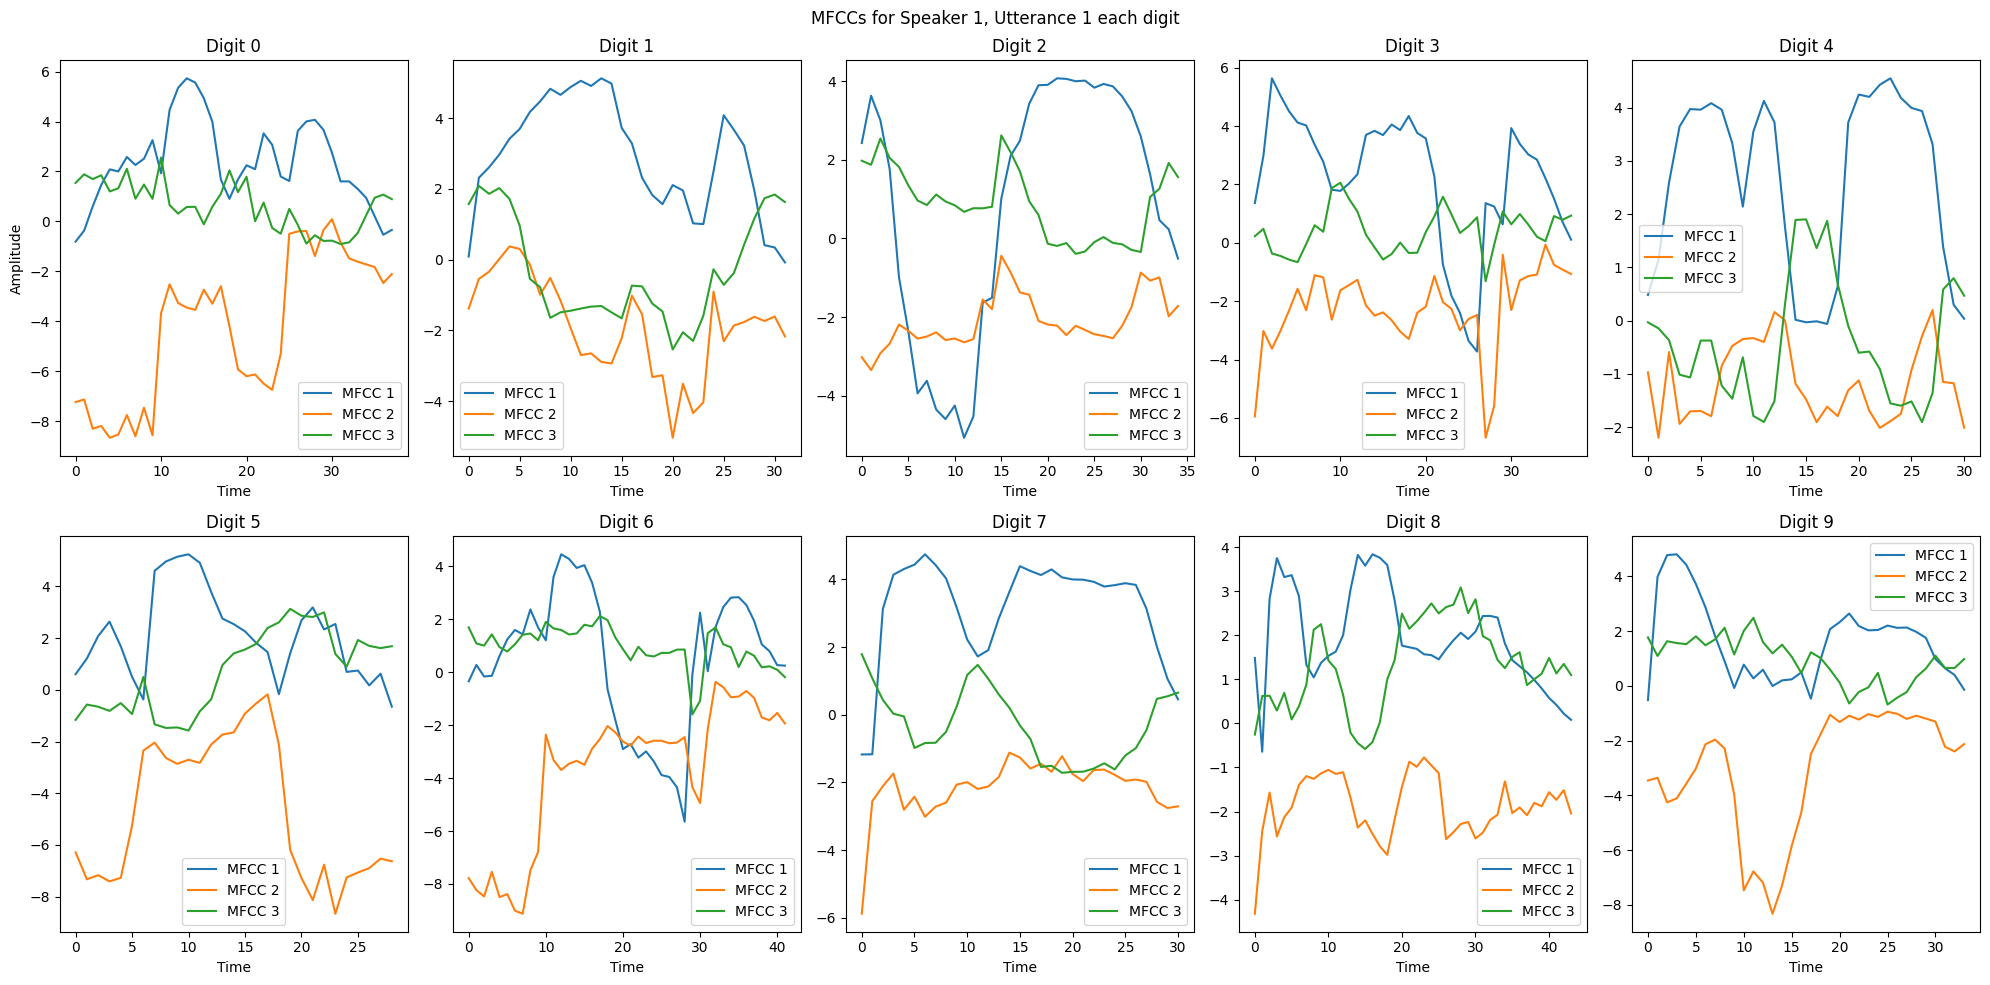

In [9]:
import matplotlib.pyplot as plt

# Create a 2x5 grid of subplots for digits 0-9
fig, axs = plt.subplots(2, 5, figsize=(20, 10), sharex=False, sharey=False)

# Loop through each digit and create a plot for it
for i in range(10):
    # Filter rows where the 'digit' column matches the current digit
    df_digit = df_speaker_1[df_speaker_1['digit'] == i].reset_index(drop=True)
    
    # Drop non-numeric columns, keeping only time-series columns (0, 1, 2, etc.)
    df_digit = df_digit.drop(columns=['digit', 'speaker', 'utterance'])
    
    # Plot columns '0', '1', and '2' for the selected digit
    axs[i // 5, i % 5].plot(df_digit['0'], label='MFCC 1')
    axs[i // 5, i % 5].plot(df_digit['1'], label='MFCC 2')
    axs[i // 5, i % 5].plot(df_digit['2'], label='MFCC 3')
    
    # Set the title and labels for each subplot
    axs[i // 5, i % 5].set_title(f'Digit {i}')
    axs[i // 5, i % 5].set_xlabel('Time')
    
    # Only set the y-axis label on the first plot for clarity
    if i == 0:
        axs[i // 5, i % 5].set_ylabel('Amplitude')
    
    # Add legend
    axs[i // 5, i % 5].legend()

# Adjust layout to prevent overlap
fig.suptitle('MFCCs for Speaker 1, Utterance 1 each digit')
plt.tight_layout()
plt.savefig('../assets/mfccs_speaker_1_utterance_1_each_digit.png')
plt.show()


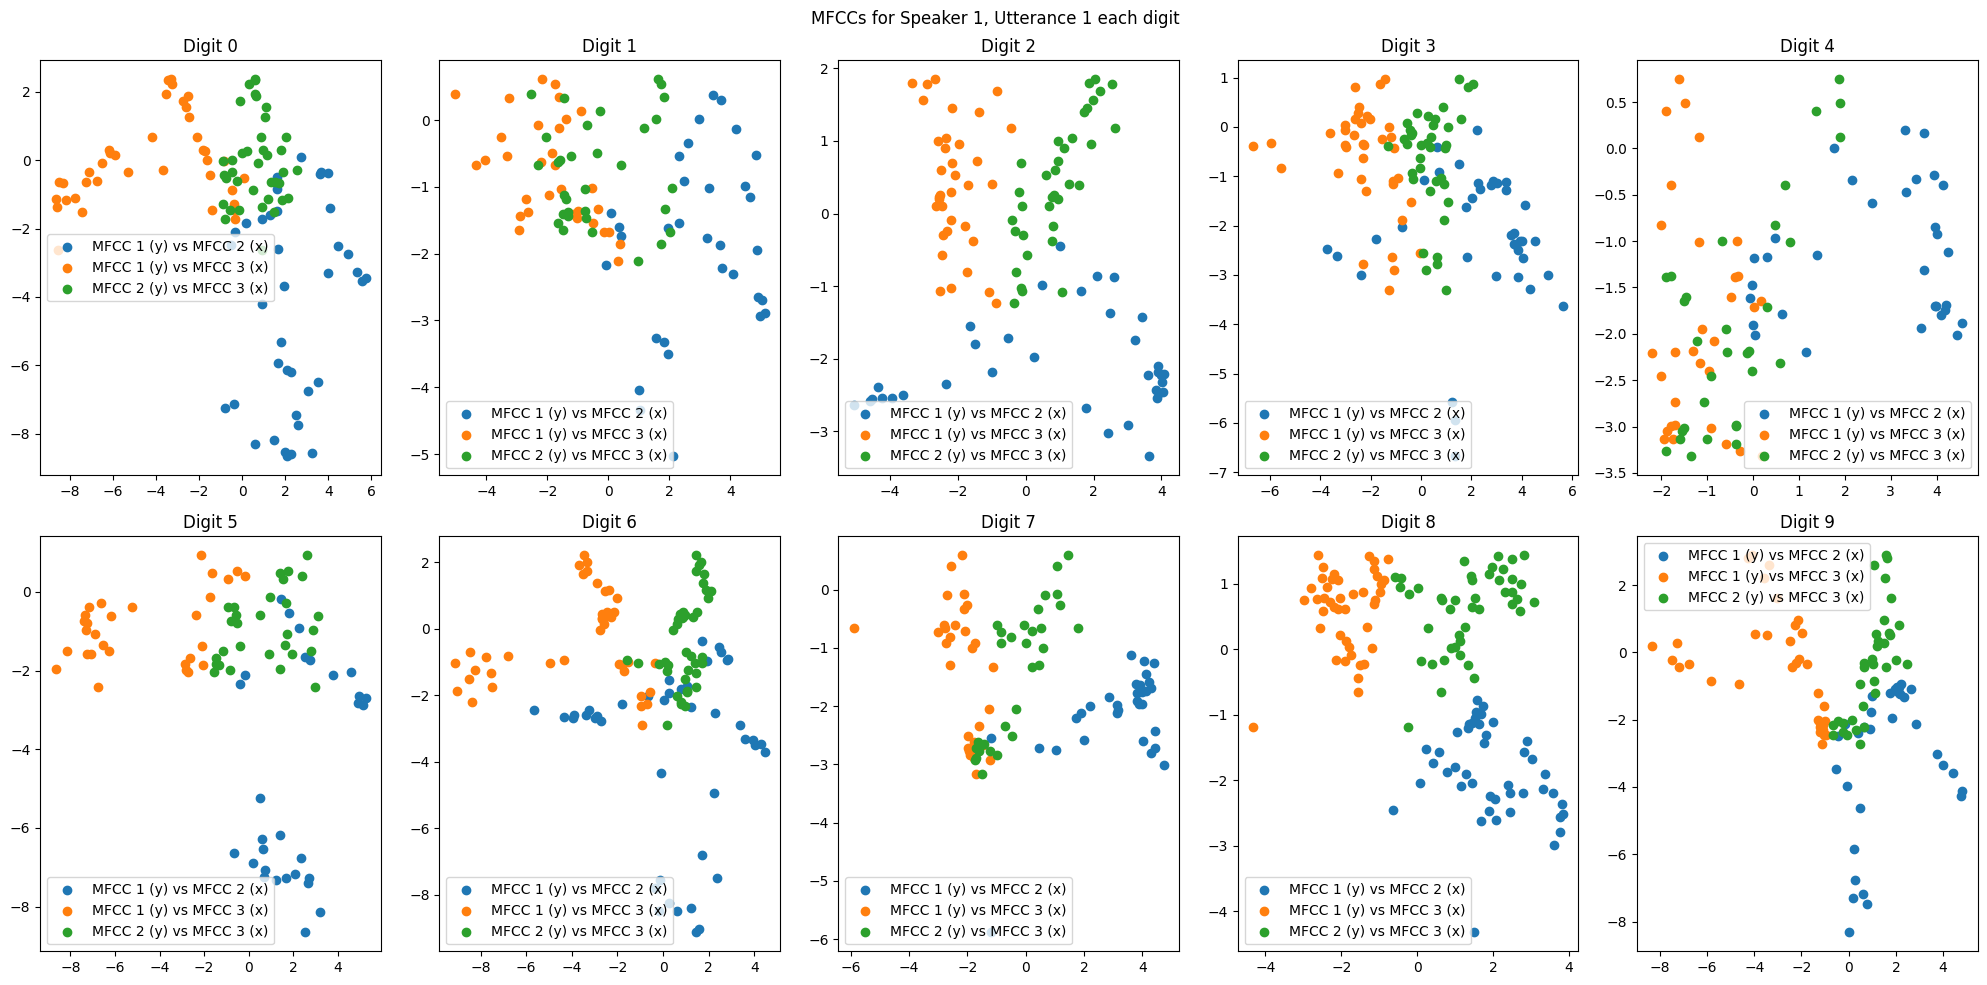

In [10]:
import matplotlib.pyplot as plt

# Create a 2x5 grid of subplots for digits 0-9
fig, axs = plt.subplots(2, 5, figsize=(20, 10), sharex=False, sharey=False)

# Loop through each digit and create a plot for it
for i in range(10):
    # Filter rows where the 'digit' column matches the current digit
    df_digit = df_speaker_1[df_speaker_1['digit'] == i].reset_index(drop=True)
    
    # Drop non-numeric columns, keeping only time-series columns (0, 1, 2, etc.)
    df_digit = df_digit.drop(columns=['digit', 'speaker', 'utterance'])
    
    # Plot columns '0', '1', and '2' for the selected digit
    axs[i // 5, i % 5].scatter(df_digit['0'], df_digit['1'], label='MFCC 1 (y) vs MFCC 2 (x)')
    axs[i // 5, i % 5].scatter(df_digit['1'], df_digit['3'], label='MFCC 1 (y) vs MFCC 3 (x)')
    axs[i // 5, i % 5].scatter(df_digit['2'], df_digit['3'], label='MFCC 2 (y) vs MFCC 3 (x)')
    
    # Set the title and labels for each subplot
    axs[i // 5, i % 5].set_title(f'Digit {i}')
    
    # Add legend
    axs[i // 5, i % 5].legend()

# Adjust layout to prevent overlap
fig.suptitle('MFCCs for Speaker 1, Utterance 1 each digit')
plt.tight_layout()
plt.savefig('../assets/mfccs_speaker_1_utterance_1_each_digit_scatter.png')
plt.show()


In [12]:
df_speaker_1

block  utterance  speaker gender  digit  time_window        0       1  \
0        1          1        1      m      0            0 -0.81101 -7.2382   
1        1          1        1      m      0            1 -0.37028 -7.1336   
2        1          1        1      m      0            2  0.59659 -8.3059   
3        1          1        1      m      0            3  1.45850 -8.1957   
4        1          1        1      m      0            4  2.08240 -8.6670   
..     ...        ...      ...    ...    ...          ...      ...     ...   
349   5941          1        1      m      9           29  1.75520 -1.1953   
350   5941          1        1      m      9           30  0.97764 -1.3049   
351   5941          1        1      m      9           31  0.64258 -2.2270   
352   5941          1        1      m      9           32  0.39527 -2.3939   
353   5941          1        1      m      9           33 -0.14135 -2.1251   

           2        3         4         5         6         7         8  \
0    1.54290 -0.64774  1.427100  0.613560  0.365160  0.088906  0.470310   
1    1.88560 -0.34316  0.967330  0.327630  0.429880  0.504790  0.415330   
2    1.69430 -0.66611  0.349670 -0.174250  0.820770  1.261100  0.416530   
3    1.84540 -1.14960  0.826600 -0.513130  0.067443  0.256370  0.115000   
4    1.19950 -1.12400  1.244500 -0.102510  0.998670  0.571740  1.038400   
..       ...      ...       ...       ...       ...       ...       ...   
349  0.62981 -2.20440 -0.550240 -0.447700  0.363600 -0.977690 -0.167180   
350  1.10170 -1.19200 -0.152340 -0.006121  0.655830 -1.185600  0.035035   
351  0.65323 -0.32860  0.245930  0.205180  0.267690 -1.086000 -0.412570   
352  0.65387 -0.44821  0.010817  0.022618  0.599320 -0.028052  0.195610   
353  0.97697 -0.19266 -0.083676  0.071493  0.492930 -0.425860  0.592590   

           9        10       11        12  
0    0.98844  0.044692  0.20817  0.511400  
1    0.28804  0.086109  0.62690  0.781150  
2    0.50050  0.571630  0.45316  0.644650  
3   -0.10915  0.085991  0.69064  0.337690  
4    0.17564 -0.032857  0.53229  0.329410  
..       ...       ...      ...       ...  
349 -0.58411 -0.455810 -0.96690 -0.377530  
350 -1.13130 -0.908750 -0.53280 -0.215070  
351 -0.78075 -0.741480 -0.53496 -0.027176  
352 -0.67306 -0.724290 -0.51561 -0.179970  
353 -0.33567 -0.529880 -0.64710 -0.665840  

[354 rows x 19 columns]

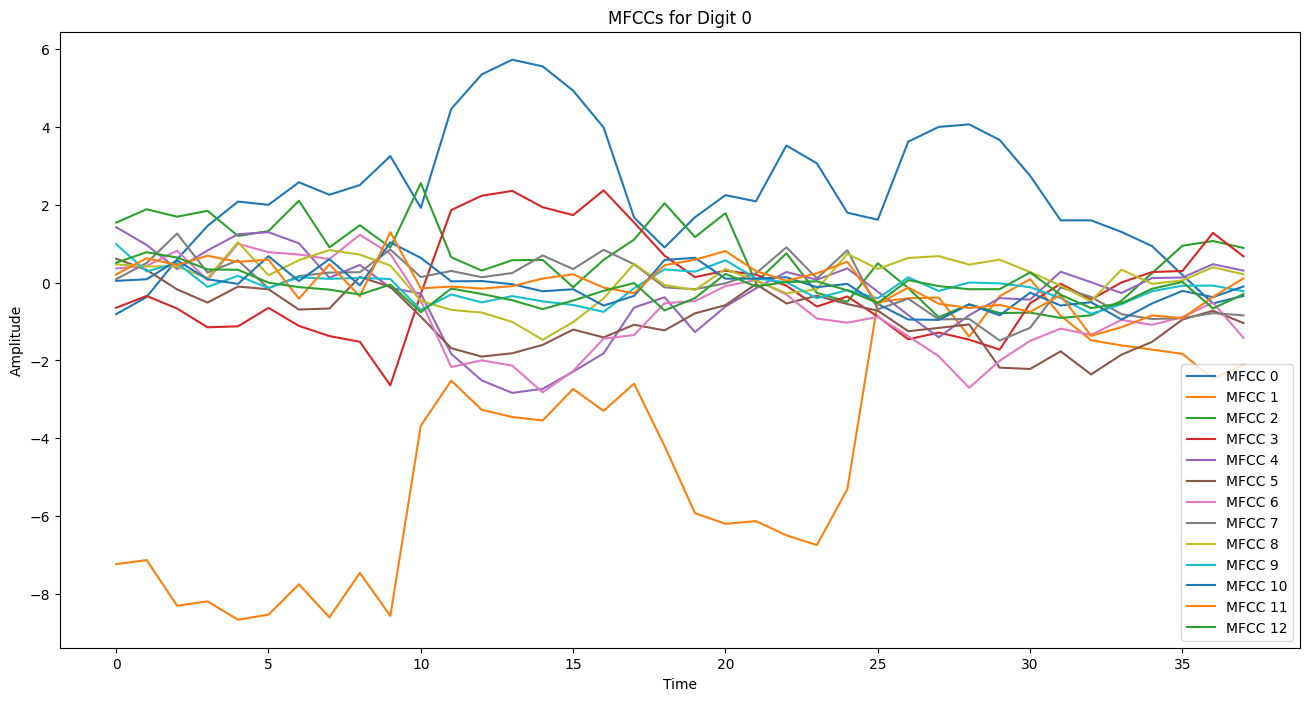

In [20]:
# plot all mfccs for a single digit
df_digit = df_speaker_1[df_speaker_1['digit'] == 0].reset_index(drop=True)
df_digit = df_digit.drop(columns=['digit', 'speaker', 'utterance', 'block', 'time_window', 'gender'])
plt.figure(figsize=(16, 8))
plt.plot(df_digit)
plt.legend(['MFCC 0', 'MFCC 1', 'MFCC 2', 'MFCC 3', 'MFCC 4', 'MFCC 5', 'MFCC 6', 'MFCC 7', 'MFCC 8', 'MFCC 9', 'MFCC 10', 'MFCC 11', 'MFCC 12'])
plt.title('MFCCs for Digit 0')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.savefig('../assets/mfccs_speaker_1_utterance_1_digit_0.png')
plt.show()


# T-SNE
old school visualization with T-SNE

In [33]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [22]:
mfccs = df.drop(columns=['digit', 'speaker', 'utterance', 'block', 'time_window', 'gender'])

In [23]:
scaler = StandardScaler()
mfccs_scaled = scaler.fit_transform(mfccs)

In [24]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(mfccs_scaled)

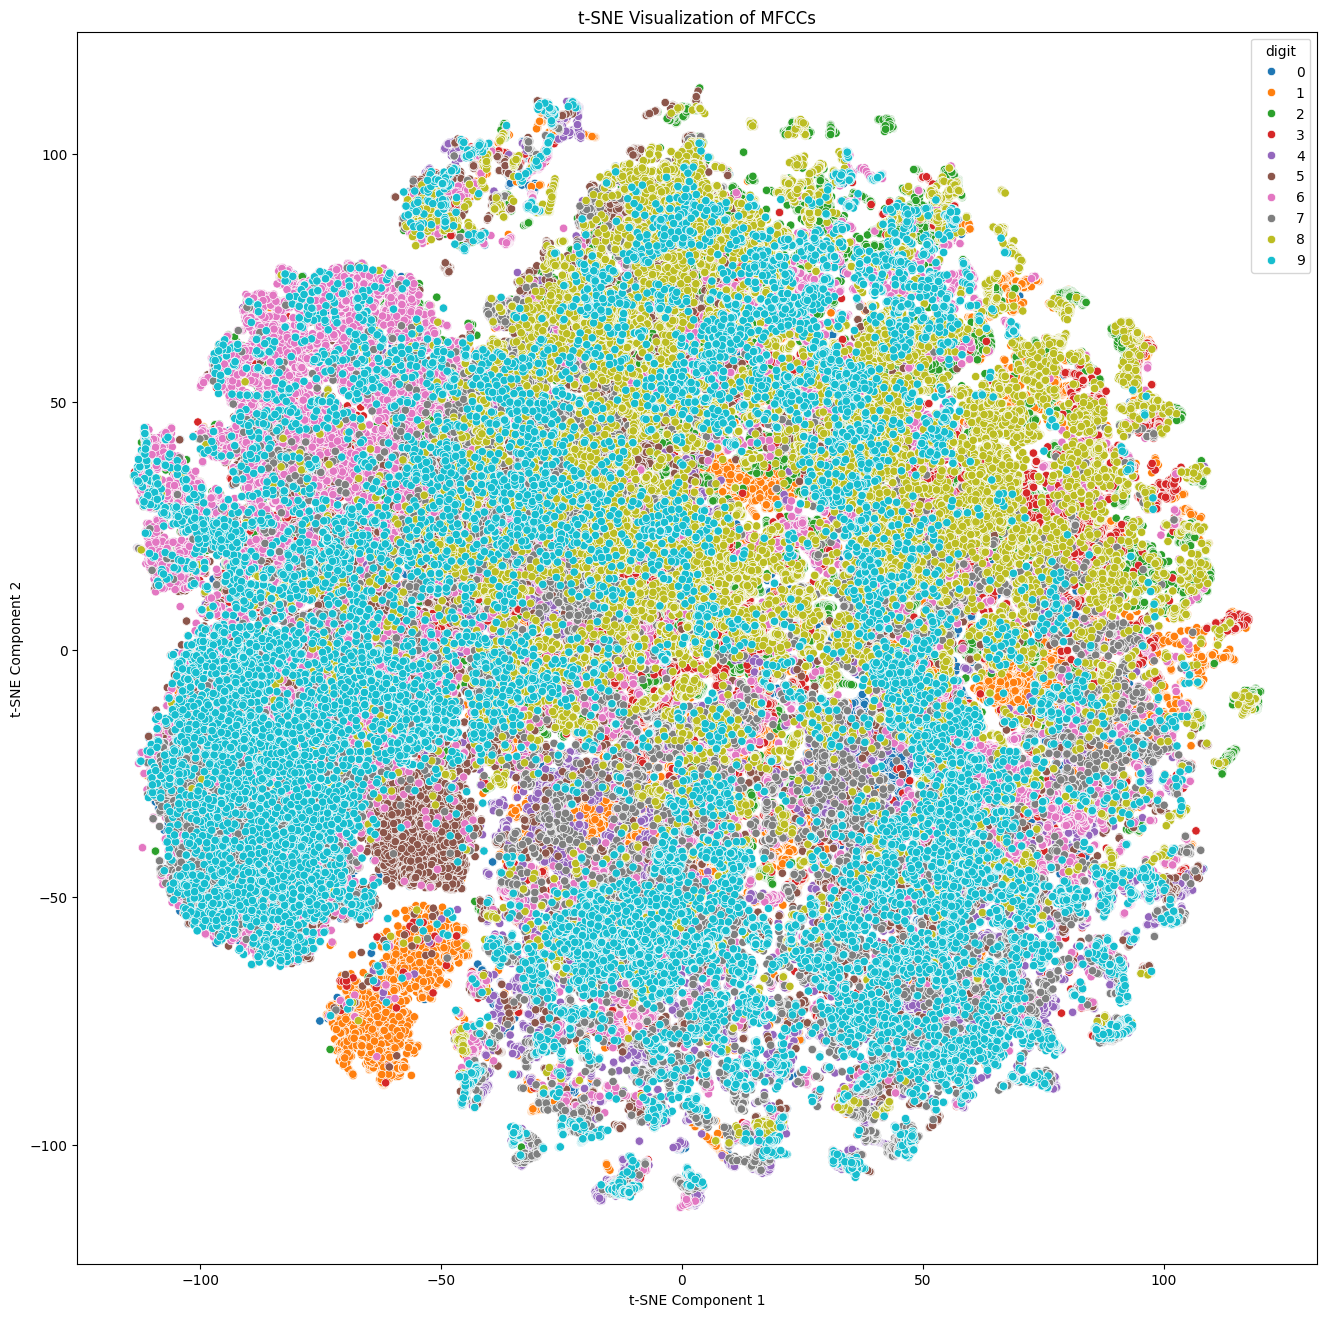

In [27]:
plt.figure(figsize=(16, 16))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df['digit'], palette='tab10')
plt.title('t-SNE Visualization of MFCCs')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.savefig('../assets/tsne_mfccs.png')
plt.show()

In [28]:
df_speaker_1

block  utterance  speaker gender  digit  time_window        0       1  \
0        1          1        1      m      0            0 -0.81101 -7.2382   
1        1          1        1      m      0            1 -0.37028 -7.1336   
2        1          1        1      m      0            2  0.59659 -8.3059   
3        1          1        1      m      0            3  1.45850 -8.1957   
4        1          1        1      m      0            4  2.08240 -8.6670   
..     ...        ...      ...    ...    ...          ...      ...     ...   
349   5941          1        1      m      9           29  1.75520 -1.1953   
350   5941          1        1      m      9           30  0.97764 -1.3049   
351   5941          1        1      m      9           31  0.64258 -2.2270   
352   5941          1        1      m      9           32  0.39527 -2.3939   
353   5941          1        1      m      9           33 -0.14135 -2.1251   

           2        3         4         5         6         7         8  \
0    1.54290 -0.64774  1.427100  0.613560  0.365160  0.088906  0.470310   
1    1.88560 -0.34316  0.967330  0.327630  0.429880  0.504790  0.415330   
2    1.69430 -0.66611  0.349670 -0.174250  0.820770  1.261100  0.416530   
3    1.84540 -1.14960  0.826600 -0.513130  0.067443  0.256370  0.115000   
4    1.19950 -1.12400  1.244500 -0.102510  0.998670  0.571740  1.038400   
..       ...      ...       ...       ...       ...       ...       ...   
349  0.62981 -2.20440 -0.550240 -0.447700  0.363600 -0.977690 -0.167180   
350  1.10170 -1.19200 -0.152340 -0.006121  0.655830 -1.185600  0.035035   
351  0.65323 -0.32860  0.245930  0.205180  0.267690 -1.086000 -0.412570   
352  0.65387 -0.44821  0.010817  0.022618  0.599320 -0.028052  0.195610   
353  0.97697 -0.19266 -0.083676  0.071493  0.492930 -0.425860  0.592590   

           9        10       11        12  
0    0.98844  0.044692  0.20817  0.511400  
1    0.28804  0.086109  0.62690  0.781150  
2    0.50050  0.571630  0.45316  0.644650  
3   -0.10915  0.085991  0.69064  0.337690  
4    0.17564 -0.032857  0.53229  0.329410  
..       ...       ...      ...       ...  
349 -0.58411 -0.455810 -0.96690 -0.377530  
350 -1.13130 -0.908750 -0.53280 -0.215070  
351 -0.78075 -0.741480 -0.53496 -0.027176  
352 -0.67306 -0.724290 -0.51561 -0.179970  
353 -0.33567 -0.529880 -0.64710 -0.665840  

[354 rows x 19 columns]

In [36]:
df_tsne = pd.DataFrame(None, columns=['tsne_1', 'tsne_2'])
df_tsne

Empty DataFrame
Columns: [tsne_1, tsne_2]
Index: []

python(22631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


t-SNE digit estimation:   0%|          | 0/10 [00:00<?, ?it/s]

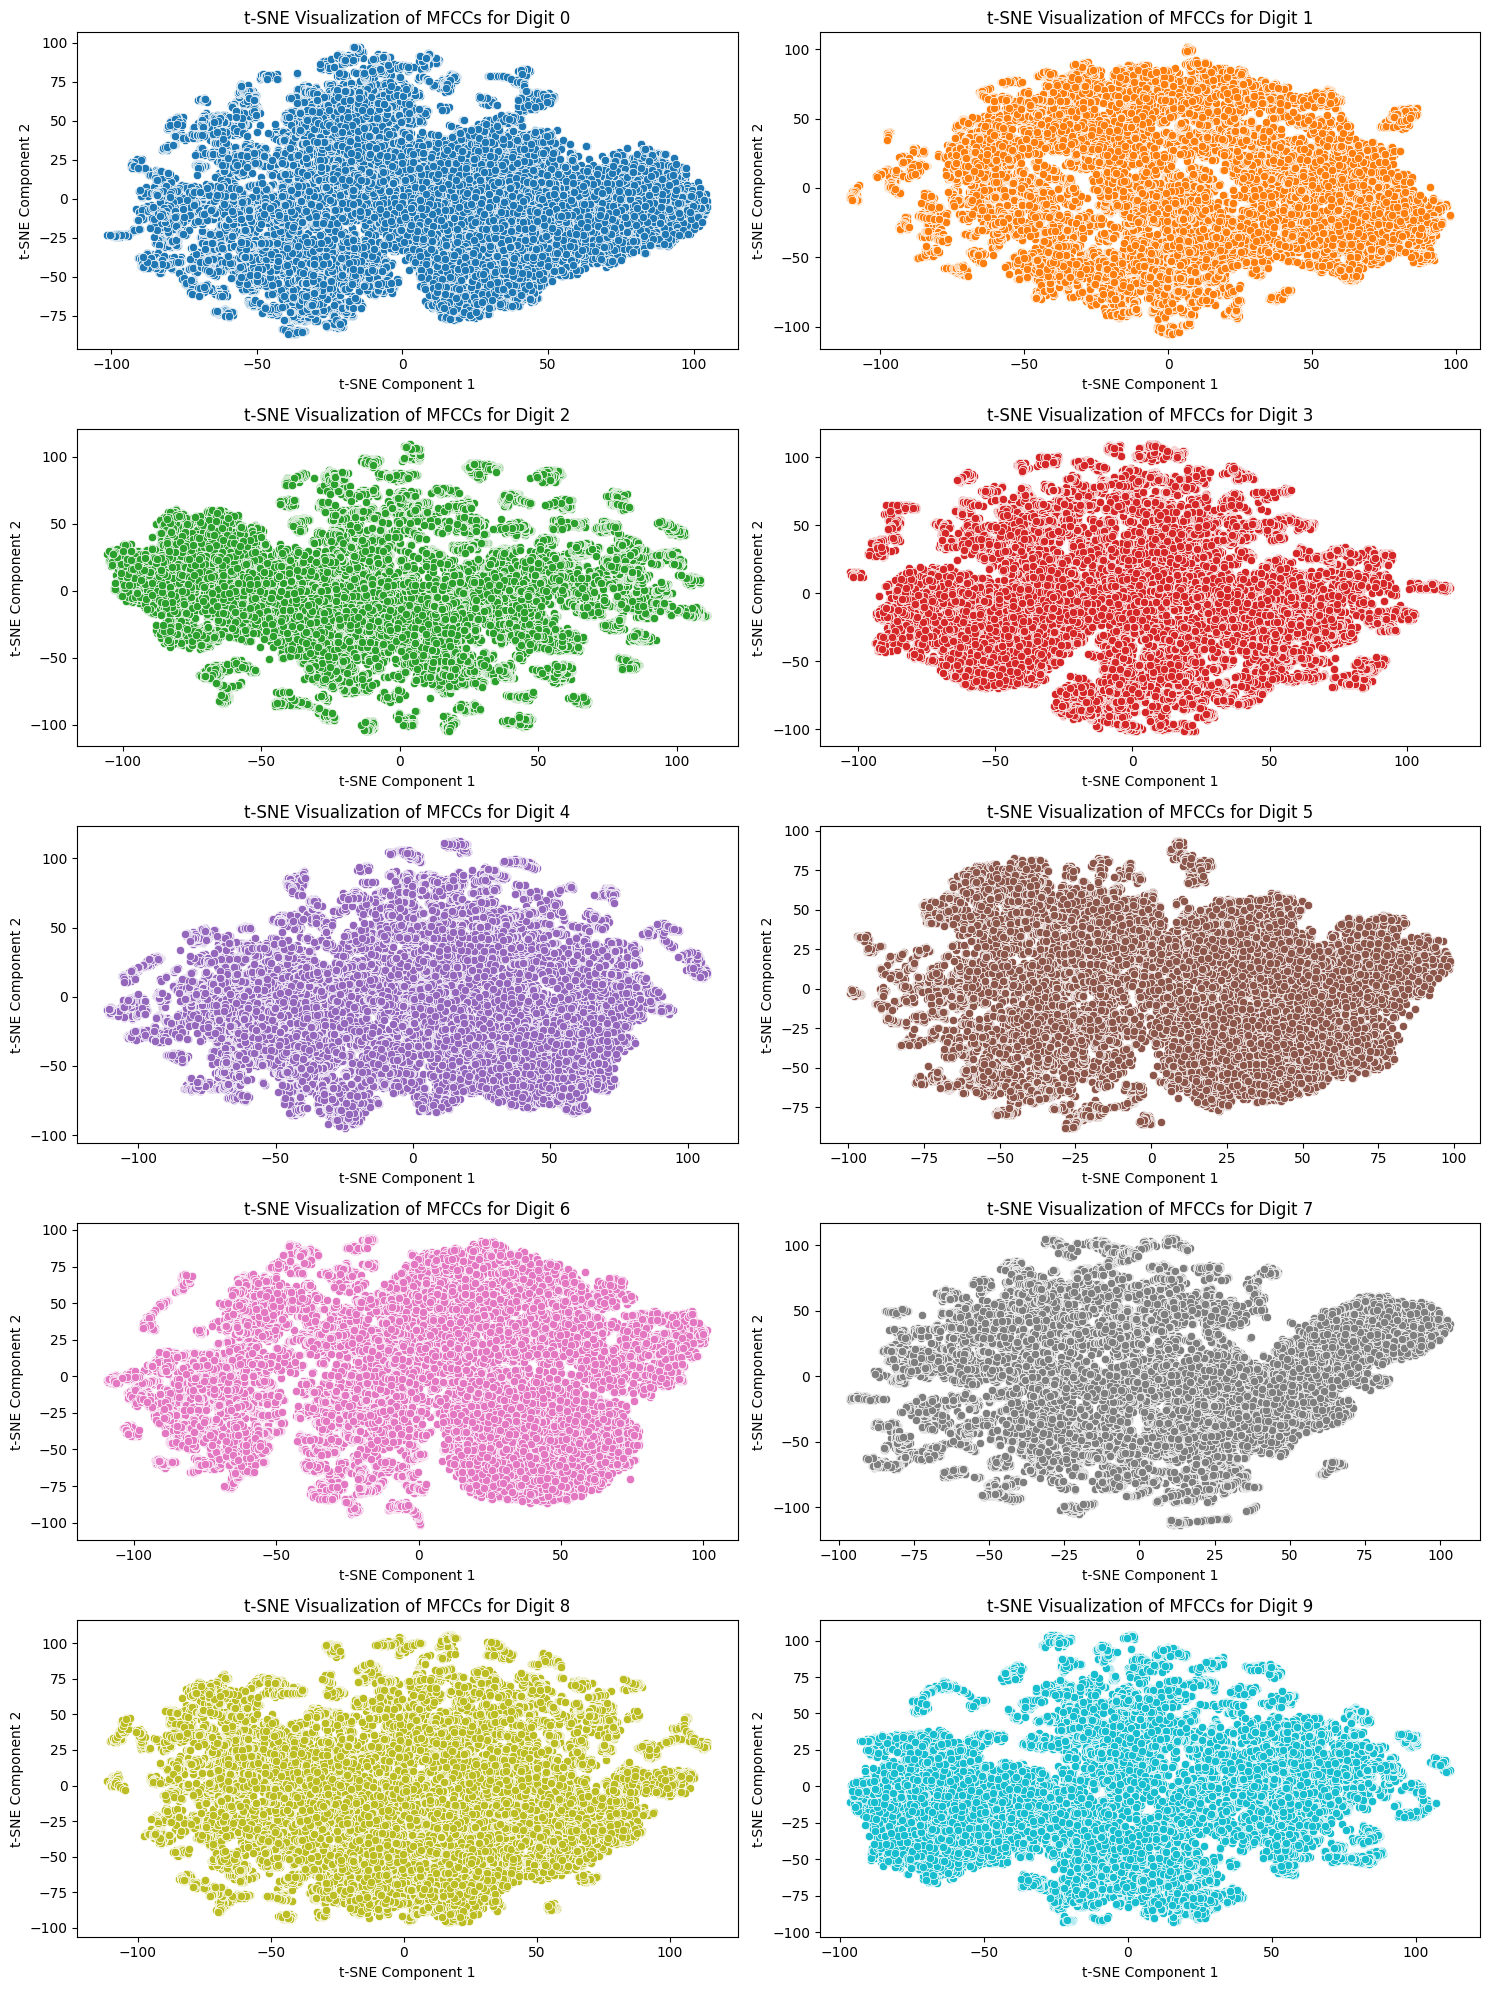

In [41]:
# Define parameters
n_rows, n_cols = 5, 2
color_palette = sns.color_palette("tab10", n_colors=10)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
axes = axes.flatten()

# List to store t-SNE results for all digits
tsne_results_list = []

# Iterate over digits and generate t-SNE plots
for digit in tqdm(range(10), desc='t-SNE digit estimation', dynamic_ncols=True): 
    # Filter data for the current digit
    df_digit = df[df['digit'] == digit]
    
    # Extract MFCC features (drop non-feature columns)
    mfccs_digit = df_digit.drop(columns=['digit', 'speaker', 'utterance', 'block', 'time_window', 'gender'])
    
    # Normalize MFCC features
    scaler = StandardScaler()
    mfccs_scaled = scaler.fit_transform(mfccs_digit)
    
    # Apply t-SNE for dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(mfccs_scaled)
    
    # Store t-SNE results for the current digit
    tsne_results_list.extend([[digit, tsne_x, tsne_y] for tsne_x, tsne_y in tsne_results])
    
    # Plot results for the current digit
    ax = axes[digit]
    sns.scatterplot(
        x=tsne_results[:, 0], 
        y=tsne_results[:, 1], 
        color=color_palette[digit],  # Corrected color usage
        ax=ax, 
        legend=None
    )
    ax.set_title(f't-SNE Visualization of MFCCs for Digit {digit}')
    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')

# Create the final DataFrame from the accumulated results
df_tsne = pd.DataFrame(tsne_results_list, columns=['digit', 'tsne_1', 'tsne_2'])

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('../assets/tsne_mfccs_grid_colored.png', dpi=300)
plt.show()

In [42]:
df_tsne.to_csv('../data/tsne_mfccs.csv', index=False)

## UMAP - Uniform Manifold Approximation and Projection
UMAP is a dimensionality reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction. The algorithm is founded on three assumptions about the data

UMAP digit estimation:   0%|          | 0/10 [00:00<?, ?it/s]

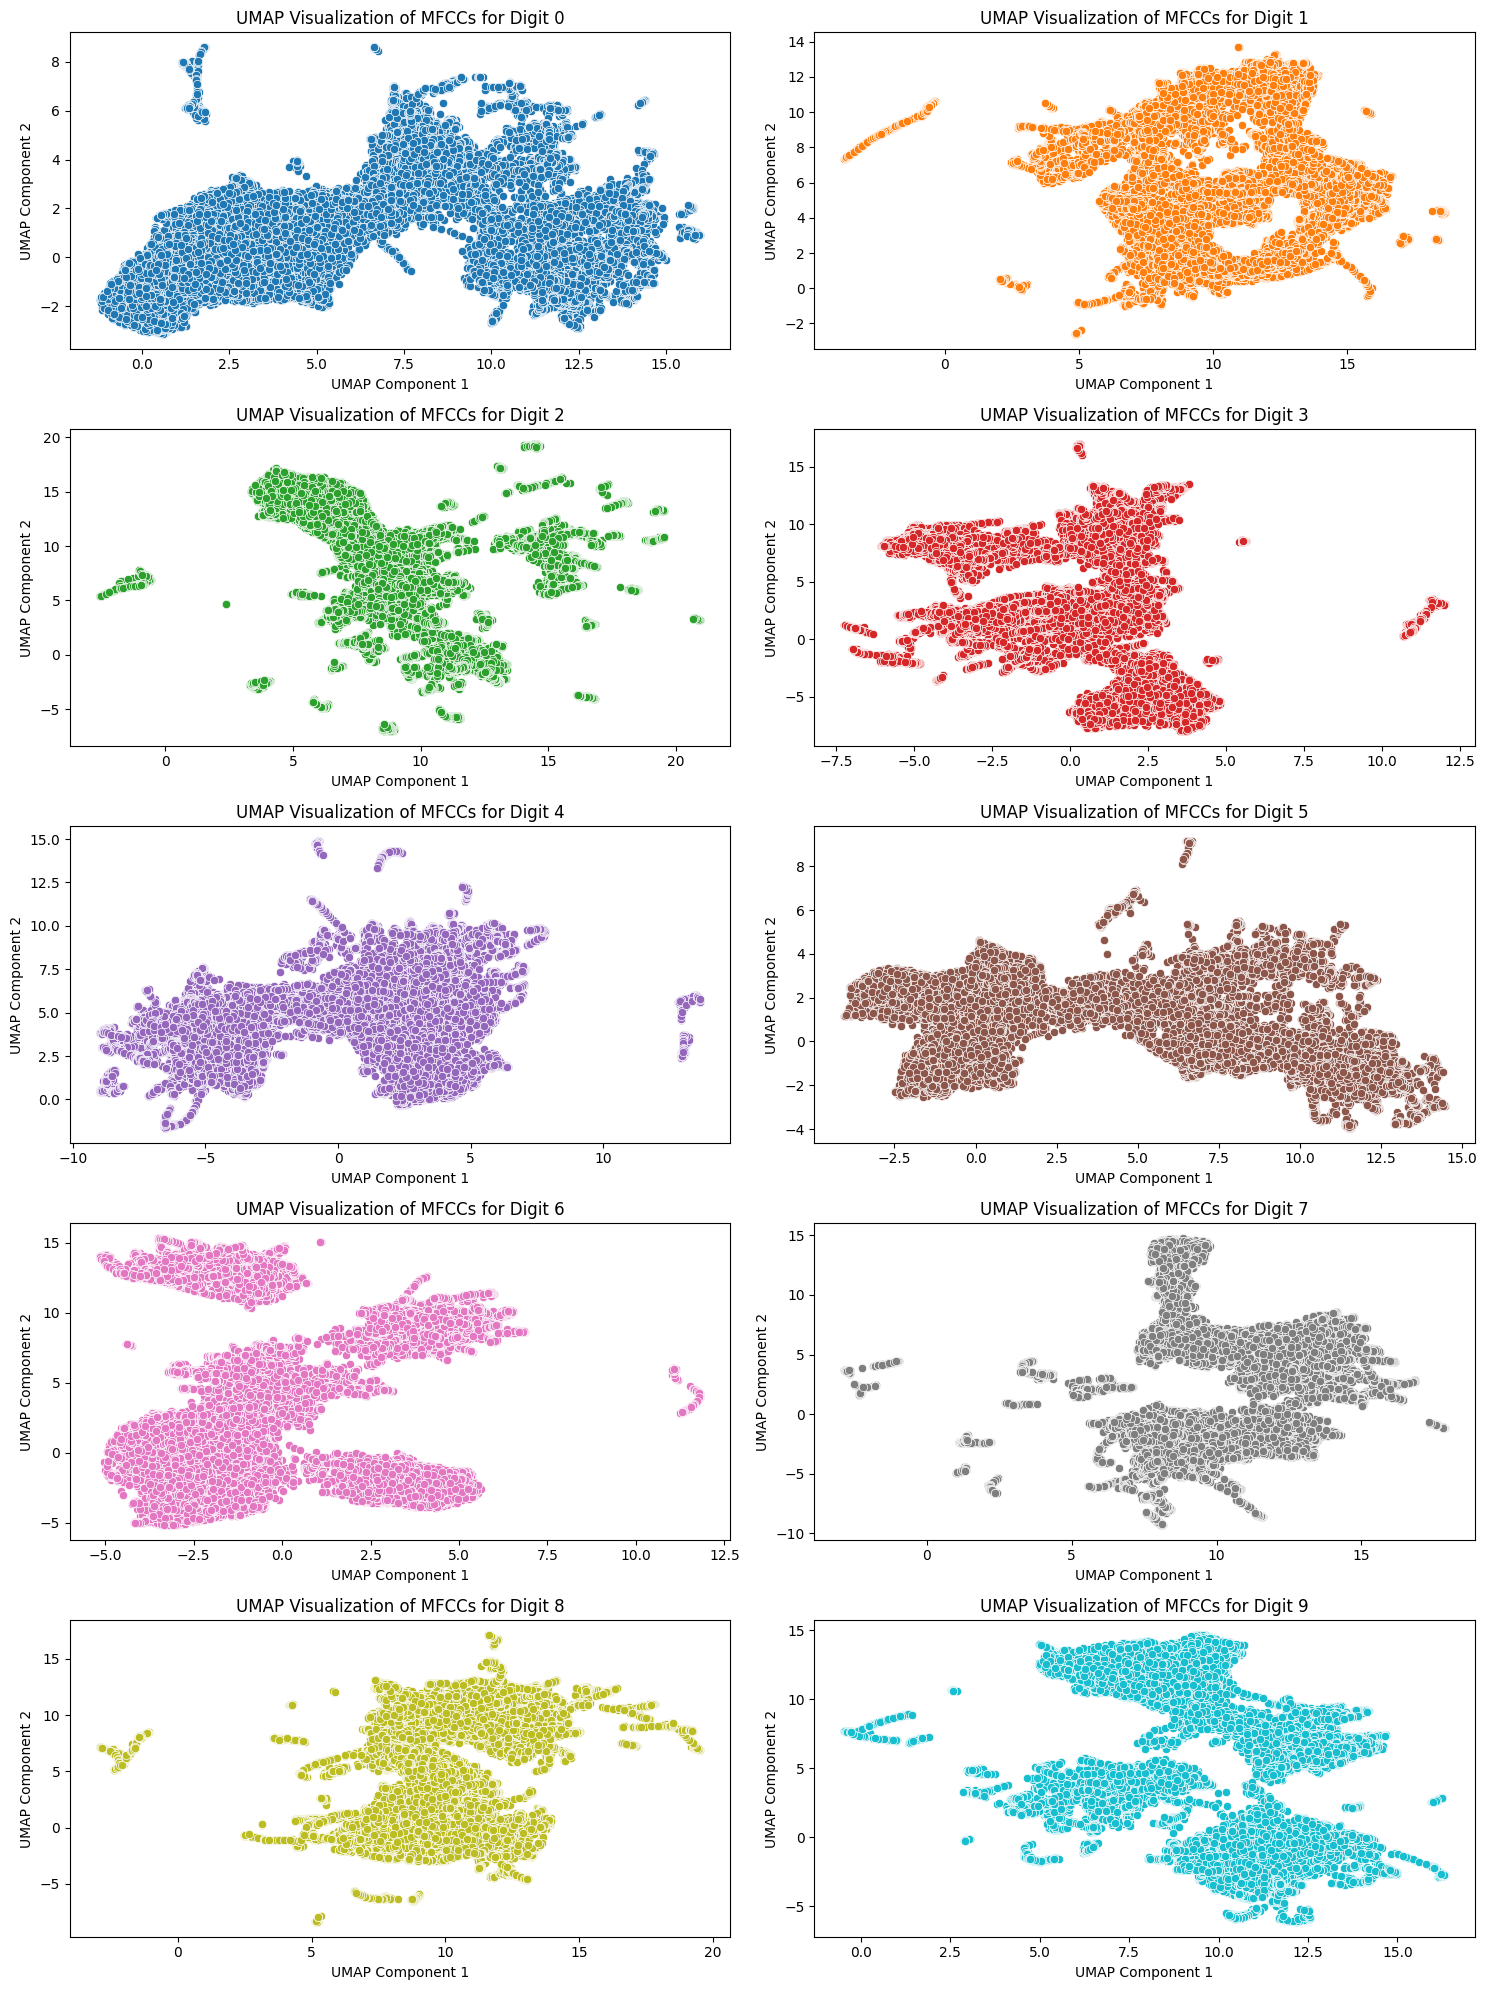

In [6]:
# Define parameters
n_rows, n_cols = 5, 2
color_palette = sns.color_palette("tab10", n_colors=10)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
axes = axes.flatten()

# List to store UMAP results for all digits
umap_results_list = []

# Iterate over digits and generate UMAP plots
for digit in tqdm(range(10), desc='UMAP digit estimation', dynamic_ncols=True):
    # Filter data for the current digit
    df_digit = df[df['digit'] == digit]
    
    # Extract MFCC features (drop non-feature columns)
    mfccs_digit = df_digit.drop(columns=['digit', 'speaker', 'utterance', 'block', 'time_window', 'gender'])
    
    # Normalize MFCC features
    scaler = StandardScaler()
    mfccs_scaled = scaler.fit_transform(mfccs_digit)
    
    # Apply UMAP for dimensionality reduction
    umap_model = umap.UMAP(n_components=2)
    umap_results = umap_model.fit_transform(mfccs_scaled)
    
    # Store UMAP results for the current digit
    umap_results_list.extend([[digit, umap_x, umap_y] for umap_x, umap_y in umap_results])
    
    # Plot results for the current digit
    ax = axes[digit]
    sns.scatterplot(
        x=umap_results[:, 0], 
        y=umap_results[:, 1], 
        color=color_palette[digit],  # Set color directly
        ax=ax, 
        legend=None
    )
    ax.set_title(f'UMAP Visualization of MFCCs for Digit {digit}')
    ax.set_xlabel('UMAP Component 1')
    ax.set_ylabel('UMAP Component 2')

# Create the final DataFrame from the accumulated results
df_umap = pd.DataFrame(umap_results_list, columns=['digit', 'umap_1', 'umap_2'])

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('../assets/umap_mfccs_grid_colored.png', dpi=300)
plt.show()

In [7]:
df_umap.to_csv('../data/umap_mfccs.csv', index=False)